# Titanic - Machine Learning from Disaster

## Imports

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Read the Data


### Separate labels for training set

In [164]:
training_data = pd.read_csv('data/train.csv')

In [165]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [166]:
X_train = training_data.drop("Survived", axis=1)
y_train = training_data["Survived"]

In [167]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [168]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Read test set

In [169]:
X_test = pd.read_csv('data/test.csv')

In [170]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Cleaning pre EDA
1. ~Drop PassengerId - Already have idx~
2. ~Drop Cabin - 80% NaN~
3. One hot encode Embarked - cat attr
4. ~One hot encode Sex - Binary cat attr~
5. Extract info from name - Text attr
6. ~Convert to int and fill Na Age - NaN's + float~
7. ~Drop Ticket - Uncorrelated - INVESTIGATE MORE~
8. ~Embarked Drop NaN's and One hot encode - Cat attr + few NaN's - CHECK~
9. Remove outliers
10. Scale
11. Take Log

In [171]:
data = training_data.copy()

In [172]:
data = data.drop(["PassengerId", "Cabin", "Ticket"], axis=1)

In [173]:
cat_encoder = OneHotEncoder()

cat = data[["Sex"]]
sex_1hot = cat_encoder.fit_transform(cat)
sex_1hot = pd.DataFrame(sex_1hot.toarray(), columns=["Male", "Female"])
data = pd.concat([data.drop("Sex", axis=1), sex_1hot], axis=1)
data

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Male,Female
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1.0,0.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,S,0.0,1.0
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,S,1.0,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,23.4500,S,1.0,0.0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,C,0.0,1.0


In [174]:
# Use mean age for age groupy by Parch??

In [175]:
imputer = SimpleImputer(strategy="mean") 
X = imputer.fit_transform(data[["Age"]])
age_full = pd.DataFrame(X, columns=["Age"], index=data[["Age"]].index)
data = pd.concat([data.drop("Age", axis=1), age_full], axis=1)

data = data.dropna(subset=["Embarked"])
data.reset_index(drop=True, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Male      889 non-null    float64
 8   Female    889 non-null    float64
 9   Age       889 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 69.6+ KB


## EDA

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Male      889 non-null    float64
 8   Female    889 non-null    float64
 9   Age       889 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 69.6+ KB


In [177]:
data.describe()

,Survived,Pclass,SibSp,Parch,Fare,Male,Female,Age
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681,0.350956,0.649044,29.653446
std,0.486260,0.834700,1.103705,0.806761,49.697504,0.477538,0.477538,12.968366
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,22.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,0.000000,1.000000,29.699118
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,1.000000,35.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,80.000000


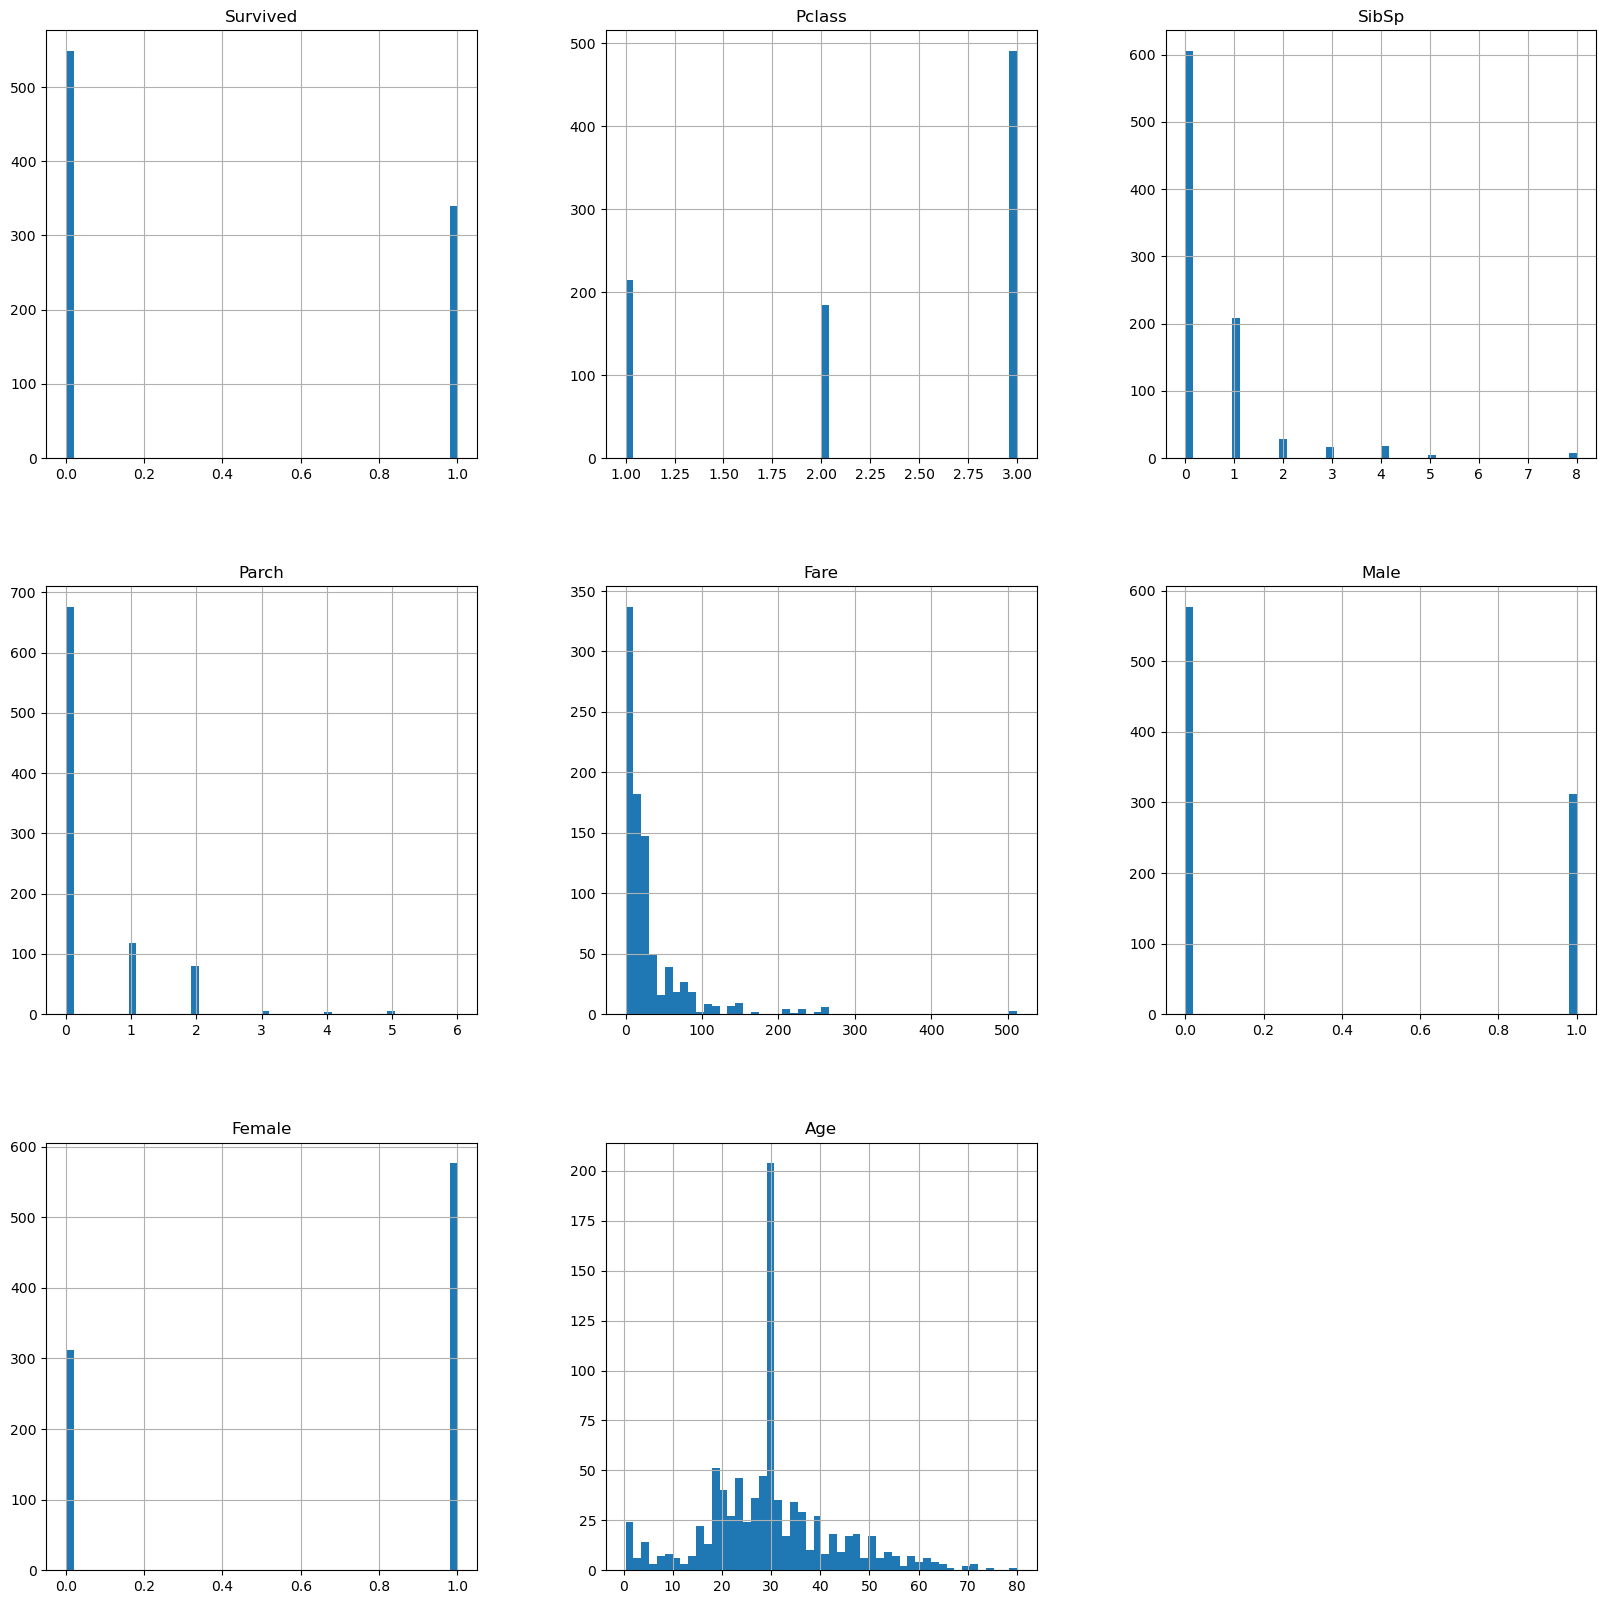

In [178]:
data.hist(bins=50, figsize=(20, 20))
plt.show()

In [179]:
categorical = list(data.select_dtypes('object'))
[data[x].value_counts() for x in categorical]

[Name
 Braund, Mr. Owen Harris              1
 Boulos, Mr. Hanna                    1
 Frolicher-Stehli, Mr. Maxmillian     1
 Gilinski, Mr. Eliezer                1
 Murdlin, Mr. Joseph                  1
                                     ..
 McCoy, Mr. Bernard                   1
 Johnson, Mr. William Cahoone Jr      1
 Keane, Miss. Nora A                  1
 Williams, Mr. Howard Hugh "Harry"    1
 Dooley, Mr. Patrick                  1
 Name: count, Length: 889, dtype: int64,
 Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64]

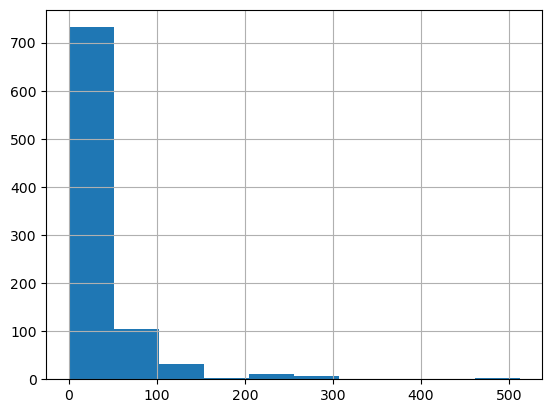

In [180]:
data["Fare"].hist()
plt.show()

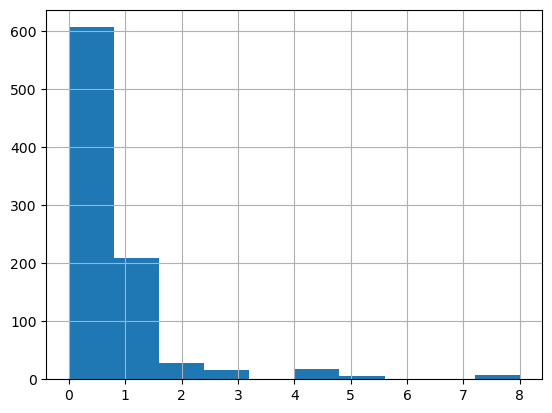

In [181]:
data["SibSp"].hist()
plt.show()

In [182]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["Survived"].sort_values()

Female     -0.541585
Pclass     -0.335549
Age        -0.074673
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
Male        0.541585
Survived    1.000000
Name: Survived, dtype: float64

In [183]:
### NEw attr with low correlation

## Data Cleaning
1. ~One hot encode Embarked - cat attr~
2. ~Extract info from name - Text attr~
3. ~Drop Ticket - Uncorrelated - INVESTIGATE MORE~
5. ~Remove outliers~
6. ~Scale~
7. ~Take Log~
8. ~Create Pipeline~

In [184]:
cat = data[["Embarked"]]
embarked_1hot = cat_encoder.fit_transform(cat)
embarked_1hot = pd.DataFrame(embarked_1hot.toarray(), columns=cat_encoder.get_feature_names_out(['Embarked']))


data = pd.concat([data.drop("Embarked", axis=1), embarked_1hot], axis=1)


In [185]:
embarked_1hot

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [186]:
data

,Survived,Pclass,Name,SibSp,Parch,Fare,Male,Female,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,0,7.2500,0.0,1.0,22.000000,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,71.2833,1.0,0.0,38.000000,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,0,7.9250,1.0,0.0,26.000000,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,53.1000,1.0,0.0,35.000000,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",0,0,8.0500,0.0,1.0,35.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",0,0,13.0000,0.0,1.0,27.000000,0.0,0.0,1.0
885,1,1,"Graham, Miss. Margaret Edith",0,0,30.0000,1.0,0.0,19.000000,0.0,0.0,1.0
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,23.4500,1.0,0.0,29.699118,0.0,0.0,1.0
887,1,1,"Behr, Mr. Karl Howell",0,0,30.0000,0.0,1.0,26.000000,1.0,0.0,0.0


In [187]:
import re
data["Name"] = data['Name'].str.extract(r'([A-Za-z]+)\.')
data['Name'] = data['Name'].replace('Mrs. Martin (Elizabeth L', 'Mrs')
data['Name'].value_counts().head(20)

Name
Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [188]:
titles_order = [
    'Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
    'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Dona', 'Jonkheer'
]
ordinal_encoder = OrdinalEncoder(categories=[titles_order])
data["Name"] = ordinal_encoder.fit_transform(data[["Name"]])
data

,Survived,Pclass,Name,SibSp,Parch,Fare,Male,Female,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.0,1,0,7.2500,0.0,1.0,22.000000,0.0,0.0,1.0
1,1,1,2.0,1,0,71.2833,1.0,0.0,38.000000,1.0,0.0,0.0
2,1,3,1.0,0,0,7.9250,1.0,0.0,26.000000,0.0,0.0,1.0
3,1,1,2.0,1,0,53.1000,1.0,0.0,35.000000,0.0,0.0,1.0
4,0,3,0.0,0,0,8.0500,0.0,1.0,35.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,5.0,0,0,13.0000,0.0,1.0,27.000000,0.0,0.0,1.0
885,1,1,1.0,0,0,30.0000,1.0,0.0,19.000000,0.0,0.0,1.0
886,0,3,1.0,1,2,23.4500,1.0,0.0,29.699118,0.0,0.0,1.0
887,1,1,0.0,0,0,30.0000,0.0,1.0,26.000000,1.0,0.0,0.0


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Name        889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Male        889 non-null    float64
 7   Female      889 non-null    float64
 8   Age         889 non-null    float64
 9   Embarked_C  889 non-null    float64
 10  Embarked_Q  889 non-null    float64
 11  Embarked_S  889 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 83.5 KB


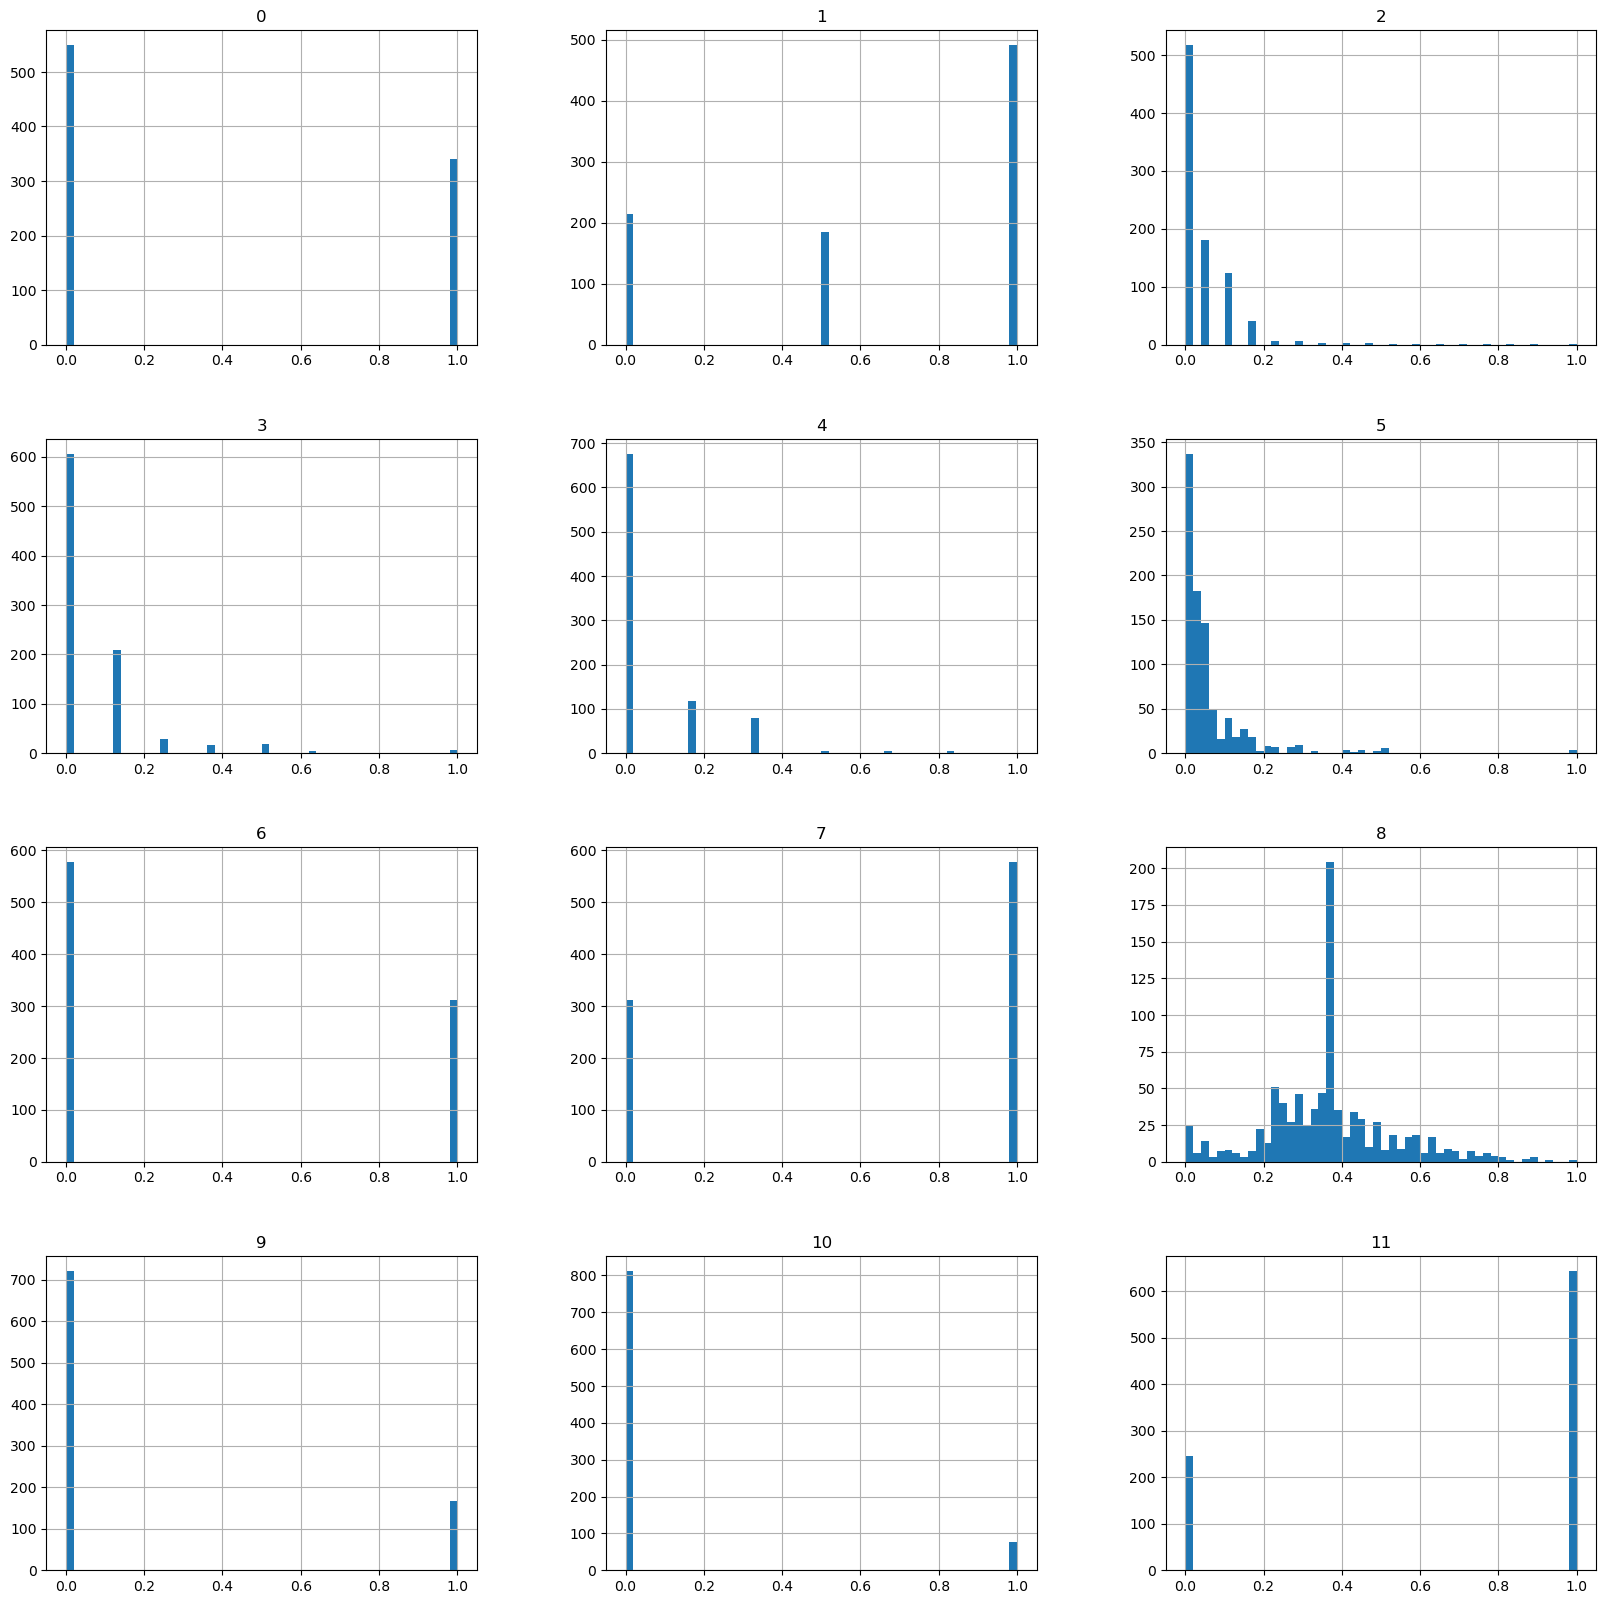

In [190]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled).hist(bins=50, figsize=(20, 20))
plt.show()

### Create the Pipeline

In [191]:

cat_attr = data.select_dtypes(include=['object']).columns.tolist()
num_attr = data.select_dtypes(include=['int64', "float64"]).columns.tolist()
print("cat", cat_attr)
print("num", num_attr)

cat []
num ['Survived', 'Pclass', 'Name', 'SibSp', 'Parch', 'Fare', 'Male', 'Female', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [192]:

data = X_train.copy()

cat_attr = data.select_dtypes(include=['object']).columns.tolist()
num_attr = data.select_dtypes(include=['int64', "float64"]).columns.tolist()


def get_feature_names_out():
    return ["Name"]


class NameTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy["Name"] = X_copy['Name'].str.extract(r'([A-Za-z]+)\.')
        return X_copy
    def get_feature_names_out(self, input_features = None):
        return ["Name"]


titles_order = [
    'Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
    'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Dona', 'Jonkheer'
]



num_transformer = ColumnTransformer(
    transformers=[
        ("drop_columns", "drop", ["PassengerId"]),
        ("fill_nan", SimpleImputer(strategy="median"), num_attr),
    ],
    remainder="passthrough"
)

cat_transformer = ColumnTransformer(
    transformers=[
        ("drop_columns", "drop", ["Cabin", "Ticket"]),
        ("OHE_sex", OneHotEncoder(), ["Sex"]),
        ("OHE_embarked", Pipeline([
            ("fill_na", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder())
        ]), ["Embarked"]),
        ("OE_name", Pipeline([
            ("extract_titles", NameTransformer()),
            ("ordinal", OrdinalEncoder(categories=[titles_order]))
        ]), ["Name"])
        
    ],
    remainder="passthrough"
)

preprocessor = ColumnTransformer([
    ("cat", cat_transformer, cat_attr),
    ("num", num_transformer, num_attr)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("scaler", MinMaxScaler())
])

X_train_clean = pipeline.fit_transform(X_train)
pd.DataFrame(X_train_clean, columns=pipeline.get_feature_names_out())

,cat__OHE_sex__Sex_female,cat__OHE_sex__Sex_male,cat__OHE_embarked__Embarked_C,cat__OHE_embarked__Embarked_Q,cat__OHE_embarked__Embarked_S,cat__OE_name__Name,num__fill_nan__PassengerId,num__fill_nan__Pclass,num__fill_nan__Age,num__fill_nan__SibSp,num__fill_nan__Parch,num__fill_nan__Fare
0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,1.0,0.271174,0.125,0.000000,0.014151
1,1.0,0.0,1.0,0.0,0.0,0.117647,0.001124,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.0,0.0,0.0,1.0,0.058824,0.002247,1.0,0.321438,0.000,0.000000,0.015469
3,1.0,0.0,0.0,0.0,1.0,0.117647,0.003371,0.0,0.434531,0.125,0.000000,0.103644
4,0.0,1.0,0.0,0.0,1.0,0.000000,0.004494,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.294118,0.995506,0.5,0.334004,0.000,0.000000,0.025374
887,1.0,0.0,0.0,0.0,1.0,0.058824,0.996629,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.0,0.0,0.0,1.0,0.058824,0.997753,1.0,0.346569,0.125,0.333333,0.045771
889,0.0,1.0,1.0,0.0,0.0,0.000000,0.998876,0.0,0.321438,0.000,0.000000,0.058556


## Model Evaluation

In [193]:


models = [KNeighborsClassifier(), SGDClassifier(), RandomForestClassifier(), LogisticRegression(), SVC()]

for m in models:
    print(cross_val_score(m, X_train_clean, y_train, cv=5, scoring="accuracy").mean())

0.8046889711882494
0.7879229175820728
0.8048019584457974
0.7934969556211161
0.8080848659845584


In [194]:
svc = SVC()
y_train_pred = cross_val_predict(svc, X_train_clean, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[519,  30],
       [141, 201]])

In [195]:
precision_score(y_train, y_train_pred)

0.8701298701298701

In [196]:
recall_score(y_train, y_train_pred)

0.5877192982456141

In [197]:
f1_score(y_train, y_train_pred)

0.7015706806282723

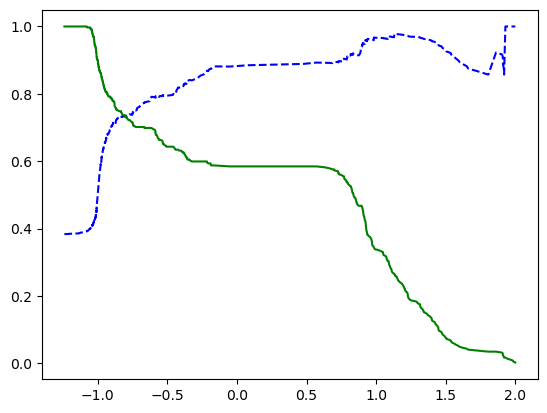

In [198]:
y_scores = cross_val_predict(svc, X_train_clean, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()

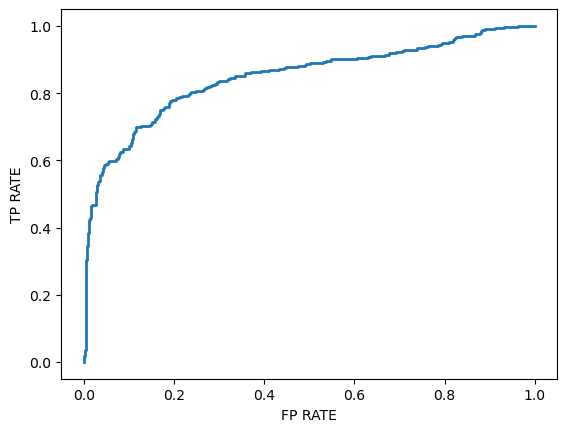

In [199]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.xlabel("FP RATE")
plt.ylabel("TP RATE")
plt.plot(fpr, tpr, linewidth=2)
plt.show()

In [200]:
roc_auc_score(y_train, y_scores)

0.8491409154336966

In [201]:
models = [SGDClassifier(), LogisticRegression(), SVC()]

for m in models:
    y_scores = cross_val_predict(m, X_train_clean, y_train, cv=3, method="decision_function")
    print(roc_auc_score(y_train, y_scores))

0.8369869725923795
0.8463074809062731
0.8491409154336966


## Hyperparameter Tuning

In [202]:
svc = SVC()

param_grid = [
    {"C" : [1, 3, 5], "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], "degree" : [1, 2, 3, 4, 5],
     "gamma" : ["scale", "auto"]},
]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 3, 5], 'degree': [1, 2, 3, 4, 5],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='accuracy')

In [203]:
print(grid_search.best_estimator_)

SVC(C=5, degree=1)


## Final Predictions

In [204]:
grid_search.fit(X_train_clean, y_train)
X_test_clean = pipeline.fit_transform(X_test)
y_test = grid_search.predict(X_test_clean)

In [205]:
y_test = pd.DataFrame(y_test, columns = ["Survived"])
y_test

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [206]:
final = pd.concat([X_test["PassengerId"], y_test["Survived"]], axis=1)
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [207]:
final.to_csv("submission.csv", index=False)